In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("datasetQ2_final.csv")

In [3]:
df.head()
df=(df-df.min())/(df.max()-df.min())

df

,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,l2_rqsts.all_demand_miss,LLC-load-misses,LLC-store-misses,L1-dcache-load-misses1,CPI
0,0.050753,0.039046,0.139024,0.400234,0.028068,0.206222,0.344161,0.047732,0.169932,0.538983
1,0.104953,0.007603,0.203986,0.086310,0.003271,0.130027,0.056547,0.023308,0.139799,0.393220
2,0.174877,0.028427,0.647441,0.040588,0.316658,0.037214,0.230418,0.028744,0.219951,0.281356
3,0.181495,0.006032,0.150064,0.048869,0.081874,0.153819,0.138401,0.010872,0.615362,0.525424
4,0.122720,0.008315,0.354607,0.067385,0.002460,0.331718,0.645829,0.001306,0.640591,0.393220
5,0.270407,0.073557,0.348111,0.010727,0.316658,0.108990,0.195556,0.033681,0.203569,0.522034
6,0.229747,0.007417,0.492615,0.057055,0.001353,0.235091,0.647646,0.008358,0.156108,0.155932
7,0.157192,0.017891,0.277593,0.033217,0.000869,0.231423,0.626365,0.000077,0.358557,0.393220
8,0.222244,0.005237,0.325889,0.054766,0.316658,0.270295,0.858210,0.021060,0.218649,0.196610
9,0.338736,0.007417,0.482334,0.031105,0.002493,0.346048,0.498947,0.281030,0.231309,0.542373


'pyenv' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df.shape

(597, 10)

In [5]:
print(df.corr())

                          branch-misses  iTLB-load-misses  dTLB-load-misses  \
branch-misses                  1.000000          0.529847         -0.386425   
iTLB-load-misses               0.529847          1.000000         -0.349855   
dTLB-load-misses              -0.386425         -0.349855          1.000000   
dTLB-store-misses              0.002335          0.078115          0.088222   
L1-icache-load-misses          0.457091          0.576459         -0.320384   
l2_rqsts.all_demand_miss       0.321670          0.462660         -0.158101   
LLC-load-misses               -0.540710         -0.419392          0.442853   
LLC-store-misses              -0.055387         -0.071275         -0.027642   
L1-dcache-load-misses1        -0.294248         -0.363656          0.274988   
CPI                           -0.125865         -0.065563         -0.164993   

                          dTLB-store-misses  L1-icache-load-misses  \
branch-misses                      0.002335               0.

In [6]:
print(df.describe())

       branch-misses  iTLB-load-misses  dTLB-load-misses  dTLB-store-misses  \
count     597.000000        597.000000        597.000000         597.000000   
mean        0.590947          0.208708          0.165920           0.077722   
std         0.221415          0.200466          0.131459           0.063466   
min         0.000000          0.000000          0.000000           0.000000   
25%         0.453233          0.044149          0.091275           0.052716   
50%         0.641882          0.131703          0.111833           0.071358   
75%         0.759057          0.327098          0.198612           0.088882   
max         1.000000          1.000000          1.000000           1.000000   

       L1-icache-load-misses  l2_rqsts.all_demand_miss  LLC-load-misses  \
count             597.000000                597.000000       597.000000   
mean                0.311396                  0.361440         0.126744   
std                 0.196632                  0.157406         

In [7]:
X = df[['branch-misses','iTLB-load-misses','dTLB-load-misses','dTLB-store-misses','L1-icache-load-misses','l2_rqsts.all_demand_miss','LLC-load-misses','LLC-store-misses','L1-dcache-load-misses1']]
y = df['CPI']

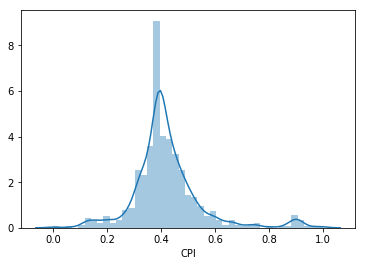

In [8]:
sns.distplot(df['CPI']);

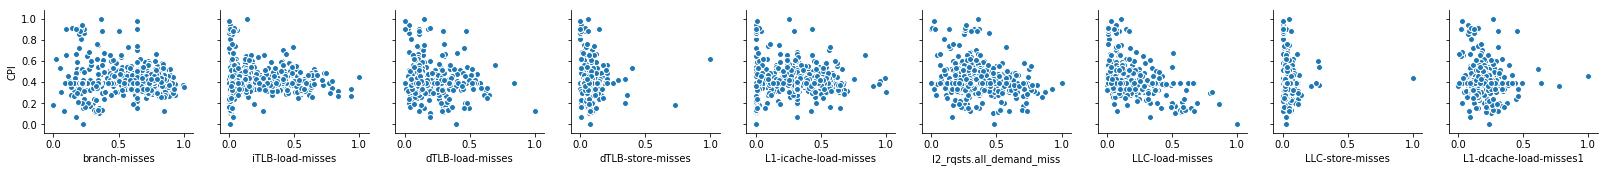

In [9]:
sns.pairplot(df, x_vars=['branch-misses','iTLB-load-misses','dTLB-load-misses','dTLB-store-misses','L1-icache-load-misses','l2_rqsts.all_demand_miss','LLC-load-misses','LLC-store-misses','L1-dcache-load-misses1'], y_vars='CPI', aspect=1, kind='scatter')
plt.show()

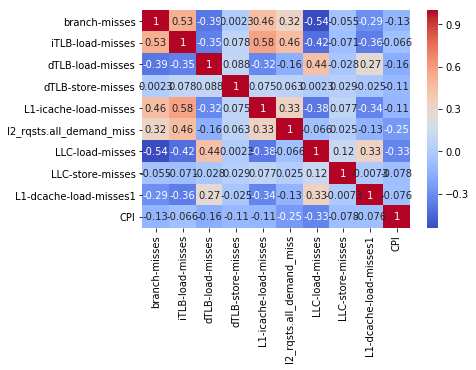

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [12]:
y_train.shape

(477,)

In [13]:
y_test.shape

(120,)

In [14]:
# reg_model = linear_model.LinearRegression()

In [15]:
#Fitting the Multiple Linear Regression model
# reg_model = LinearRegression().fit(X_train, y_train)
# print(f"Linear Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [16]:
# from sklearn.linear_model import Ridge
# reg_model = Ridge(alpha=0.9).fit(X_train, y_train)
# print(f"Ridge Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Ridge Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [18]:

reg_model=LinearRegression(positive= True)
reg_model.fit(X_train,y_train)


TypeError: __init__() got an unexpected keyword argument 'positive'

In [ ]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

In [ ]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [ ]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

In [ ]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)

print()
print()
mae = metrics.mean_absolute_error(y_train, x_pred)
mse = metrics.mean_squared_error(y_train, x_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_train, x_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)


In [ ]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)